In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.metrics import silhouette_score,completeness_score

In [2]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [6]:
#creating cluster
model = KMeans(n_clusters=3,random_state=0)
model.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [7]:
model.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [8]:
model.inertia_

80.0888613219962

In [9]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
    print(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


200.0
104.96163315756871
80.0888613219962
57.55425863091104
50.52026552535068
43.927464044975736
40.52183461131976
34.68738839784909
32.70648136388185
28.31163939712256


Text(0.5, 1.0, 'Elbow Method')

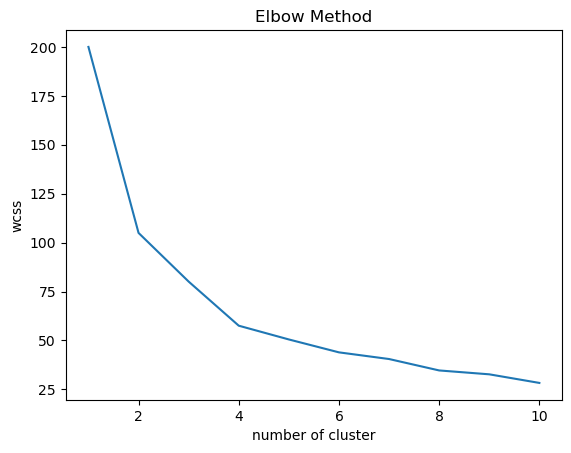

In [10]:
# elbow plot
plt.plot(range(1,11),wcss)
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('Elbow Method')

In [11]:
#build final model
model_final=KMeans(n_clusters=4,random_state=0)
model_final.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [12]:
model_final.inertia_

57.55425863091104

In [13]:
model_final.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [14]:
df['clusterid']=model_final.labels_

In [15]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [16]:
grp=df.groupby('clusterid')
grp

In [17]:
for x,y in grp:
    print(y)
    print('-----------------------------------------------------------------------------')

       Unnamed: 0  Murder  Assault  UrbanPop  Rape  clusterid
6     Connecticut     3.3      110        77  11.1          0
7        Delaware     5.9      238        72  15.8          0
10         Hawaii     5.3       46        83  20.2          0
13        Indiana     7.2      113        65  21.0          0
15         Kansas     6.0      115        66  18.0          0
20  Massachusetts     4.4      149        85  16.3          0
29     New Jersey     7.4      159        89  18.8          0
34           Ohio     7.3      120        75  21.4          0
35       Oklahoma     6.6      151        68  20.0          0
36         Oregon     4.9      159        67  29.3          0
37   Pennsylvania     6.3      106        72  14.9          0
38   Rhode Island     3.4      174        87   8.3          0
43           Utah     3.2      120        80  22.9          0
45       Virginia     8.5      156        63  20.7          0
46     Washington     4.0      145        73  26.2          0
49      

In [18]:
grp.agg(['mean','max','min'])

C:\Users\User\AppData\Local\Temp\ipykernel_7264\1794850583.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grp.agg(['mean','max','min'])


Murder                Assault             UrbanPop          \
                mean   max  min        mean  max  min       mean max min   
clusterid                                                                  
0           5.656250   8.5  3.2  138.875000  238   46  73.875000  89  60   
1          10.815385  15.4  7.9  257.384615  335  178  76.000000  91  48   
2           3.600000   9.7  0.8   78.538462  120   45  52.076923  66  32   
3          13.937500  17.4  8.8  243.625000  337  188  53.750000  66  44   

                Rape              
                mean   max   min  
clusterid                         
0          18.781250  29.3   8.3  
1          33.192308  46.0  24.0  
2          12.176923  16.5   7.3  
3          21.412500  26.9  16.1

In [19]:
#Evaluate the model
silhouette_score(df.iloc[:,1:],model_final.labels_)

0.2119210419004063

### Hierarchical Clustering


In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [36]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [37]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [39]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [49]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [61]:
hc= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc.fit(scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [62]:
labels=hc.labels_
labels

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [63]:
df['clster_id']=labels

In [64]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [67]:
grp=df.groupby(['clster_id'])
grp

In [70]:
for x,y in grp:
    print(y)
    print('---------------------------------------------------------------------------------')

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clster_id
0          Alabama    13.2      236        58  21.2          0
1           Alaska    10.0      263        48  44.5          0
2          Arizona     8.1      294        80  31.0          0
4       California     9.0      276        91  40.6          0
5         Colorado     7.9      204        78  38.7          0
8          Florida    15.4      335        80  31.9          0
9          Georgia    17.4      211        60  25.8          0
12        Illinois    10.4      249        83  24.0          0
17       Louisiana    15.4      249        66  22.2          0
19        Maryland    11.3      300        67  27.8          0
21        Michigan    12.1      255        74  35.1          0
23     Mississippi    16.1      259        44  17.1          0
24        Missouri     9.0      178        70  28.2          0
27          Nevada    12.2      252        81  46.0          0
30      New Mexico    11.4      285        70  32.1    

In [72]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
clster_id,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [73]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [76]:
from scipy.cluster import hierarchy

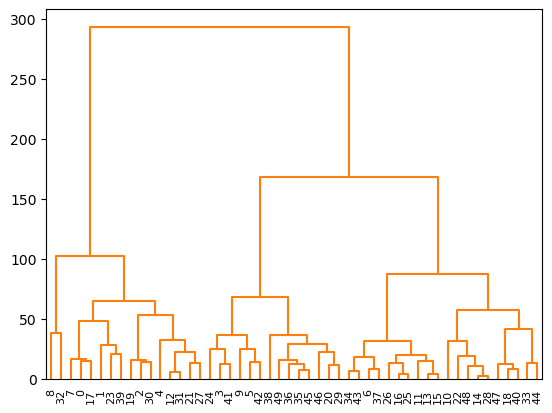

In [81]:
hr = hierarchy.linkage(df.iloc[:,1:5], method='complete')
dn = hierarchy.dendrogram(hr, color_threshold=20000)

###### DBSCAN

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [102]:
df = pd.read_csv('crime_data.csv')

In [103]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [107]:
scaler = StandardScaler()
data_scaled=scaler.fit_transform(df.iloc[:,1:])
data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [108]:
 df1=df.drop("Unnamed: 0",axis=1)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [113]:
model = DBSCAN(eps=1.5,min_samples=12)
model.fit(data_scaled)

DBSCAN(eps=1.5, min_samples=12)

In [115]:
labels = model.labels_
labels

array([-1, -1, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [116]:
df['Labels']=labels

In [119]:

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Labels
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1


In [120]:
grp = df.groupby('Labels')
grp

In [122]:
for x,y in grp:
    print(y)
    print('--------------------------------------------------------------------------------')

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  Labels
0          Alabama    13.2      236        58  21.2      -1
1           Alaska    10.0      263        48  44.5      -1
2          Arizona     8.1      294        80  31.0      -1
4       California     9.0      276        91  40.6      -1
8          Florida    15.4      335        80  31.9      -1
9          Georgia    17.4      211        60  25.8      -1
17       Louisiana    15.4      249        66  22.2      -1
19        Maryland    11.3      300        67  27.8      -1
23     Mississippi    16.1      259        44  17.1      -1
27          Nevada    12.2      252        81  46.0      -1
31        New York    11.1      254        86  26.1      -1
32  North Carolina    13.0      337        45  16.1      -1
39  South Carolina    14.4      279        48  22.5      -1
--------------------------------------------------------------------------------
       Unnamed: 0  Murder  Assault  UrbanPop  Rape  Labels
3        Arkansas   

In [123]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Labels,,,,
-1,12.815385,272.692308,65.692308,28.676923
0,6.021622,134.945946,65.486486,18.616216
